Projeto 3 - Modelagem de um sistema mecânico

Grupo 10 - Luca Melão, Thiago Youssef e Pedro Paulo Tibério

Turma B

In [33]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

In [34]:
# Implementação do nosso bungee jumping

# Parâmetros do nosso modelo
g = 9.8 # Aceleração da gravidade, em m/s2
m = 80 # Massa da pessoa, em kg
𝜌 = 1.0 # Densidade do ar, em kg/m3
Cd = 0.5 # Coeficiente de penetração aerodinâmica
h = 1.70 # Altura da pessoa
A = 0.0425 # Área da secção transversal da pessoa
l0 = 10 # Comprimento inicial da corda

# Condições iniciais
y = -10
vy = 0

# Listas que serão usadas no ODEINT
dt = 1e-3
ls_tempo = np.arange(0, 20, dt)
cond_inicial = [y,vy]

# Damping
D = 74

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


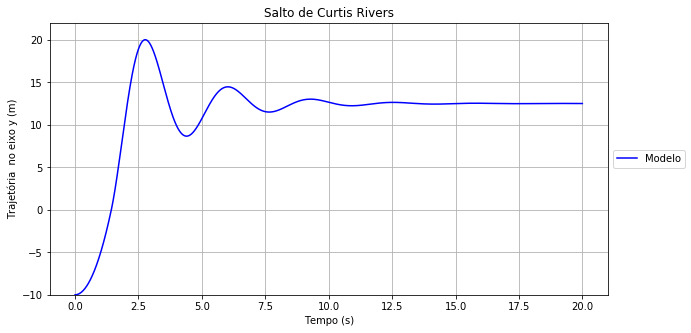

In [35]:
# Implementação do nosso modelo para o salto de bungee jumping

# Validação do modelo pelo salto de Curtis Rivers

# Atualização dos parâmetros 
m = 90 # Massa de Curtis em kg (com o equipamento)
h = 1.80 # Altura de Curtis em m
𝜌 = 0.8 # Densidade do ar à 4630m de altura, em kg/m3

# Função que implementa o nosso modelo
def modelo1(X, t):
    y = X[0]
    vy = X[1]
    x = (y-l0)
    k = 350
    dhdt = vy
    if vy > 0:  
        Ar = (0.5*𝜌*Cd*A*vy**2) 
    else:
        Ar = (-(0.5*𝜌*Cd*A*vy**2))
    if y < 0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - (D*vy)/m
    derivadas = [dhdt,dvydt]
    return derivadas

# Resultado do ODEINT
result = odeint(modelo1,cond_inicial,ls_tempo)
h = result[:,0]

# Plotando gráfico do modelo 1
fig = plt.figure(figsize=(10,5))
plt.title("Salto de Curtis Rivers")
ax = fig.add_subplot(111)
plt.plot(ls_tempo,h, 'b-', label="Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Trajetória  no eixo y (m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
ax.set_ylim(-10, 22)
plt.show()


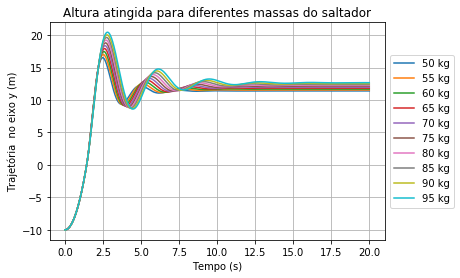

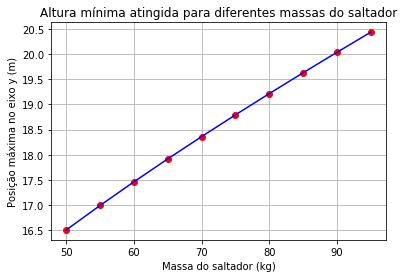

In [36]:
# Gráfico conclusivo e pergunta a ser respondida pelo modelo
# Qual a altura máxima atinginda no salto para diferentes valores de massa do saltador?

# Declara a lista de massas
lista_massas = np.arange(50, 100, 5)

# Função que implementa nosso modelo com diferentes massas
def modelo2(X, t, m):
    y = X[0]
    vy = X[1]
    x = (y-l0)
    k = 350
    dhdt = vy
    if vy > 0:  
        Ar = (0.5*𝜌*Cd*A*vy**2) 
    else:
        Ar = (-(0.5*𝜌*Cd*A*vy**2))
    if y < 0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - (D*vy)/m
    derivadas = [dhdt,dvydt]
    return derivadas

# Plotando gráfico do modelo 2
ls_max = []
for massa in lista_massas:
    Solucao = odeint(modelo2,cond_inicial, ls_tempo, args=(massa,))    
    ls_max.append(max(Solucao[:,0]))
    plt.plot(ls_tempo, Solucao[:,0], label = "{0} kg".format(massa))
    
plt.title('Altura atingida para diferentes massas do saltador')
plt.xlabel('Tempo (s)')
plt.ylabel('Trajetória  no eixo y (m)')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    
# Gráfico conclusivo
plt.title('Altura mínima atingida para diferentes massas do saltador')   
plt.plot(lista_massas,ls_max, 'ro')
plt.plot(lista_massas,ls_max, 'b')
plt.xlabel('Massa do saltador (kg)')
plt.ylabel('Posição máxima no eixo y (m)')
plt.grid(True)
plt.show()
